# DS в разработке инновационных решений


**Этапы работы**
1. Определение цели и задач
2. Сбор и хранение данных
3. Предварительная обработка данных
    - Загрузка и первичный анализ данных
    - Преобразование данных
    - Описательная статистика
    - Визуализация данных
    - Обработка выбросов
    - Обработка пропусков и дубликатов
    - Создание новых признаков
    - Удаление столбцов с большим количеством пропусков
4. Статистический анализ
    - Корреляционный анализ
    - Удаление высококоррелированных признаков
    - Анализ мультиколлинеарности
5. Подготовка данных к моделированию
    - Разделение данных на обучающую и тестовую выборки
6. Моделирование
    - Выбор и обучение моделей
    - Настройка гиперпараметров
7. Оценка модели
    - Оценка производительности моделей
    - Кросс-валидация
8. Итоговый анализ и вывод



# 1. Определение цели и требований

**Цель** данного кейса заключается в создании модели регрессии, которая позволит прогнозировать изменения Гармонии Бессмертия на основе собранных данных о работе портала. 

Основные задачи:
- Обработка данных: Данные должны быть очищены и подготовлены для анализа, включая обработку пропущенных значений, нормализацию и кодирование категориальных переменных.

- Исследовательский анализ данных (EDA): Провести анализ собранных данных, чтобы выявить закономерности и взаимосвязи между параметрами. Визуализировать данные для лучшего понимания.

- Построение модели: Выбрать несколько моделей регрессии и обучить их на подготовленных данных.

- Оценка моделей: Оценить производительность каждой модели с использованием выбранных метрик ошибки и выбрать модель с наименьшей ошибкой.

- Визуализация результатов: Построить графики, которые показывают реальные и предсказанные значения, чтобы проиллюстрировать качество предсказаний.

- Выводы: Подвести итоги работы, отразив ключевые выводы и результаты.


# 2. Сбор и хранените данных

Данные предоставлялись, поэтому этот шаг можно пропустить

# 3. Предварительная обработка данных

Импорт библиотек необходимых для исследования и обработки данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

**Загрузка и первичный анализ данных**

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,Исток не вернул выдох,1.096,1.394603,5.947,Древний Ветер развеялся,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,Исток не вернул выдох,1.389,1.394603,7.574,Древний Ветер развеялся,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,Исток не вернул выдох,1.658,1.394603,9.007,Древний Ветер развеялся,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,1.394603,11.197,1.026,26.373,0.522,0.95,0.975


Данная функция дает понимае о всех измеренных параметрах, которые могут влиять на "Гармонию Бессмертия".
Также сразу можно заметить, что большинство параметров числовые.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  float64
 12  Давление выдоха Истока          

Данная команда выводит основную информацию о DataFrame.
В том числе:
 - Количество строк *(11934)*
 - Количество столбцов *(18)*
 - Тип индекса *(RangeIndex)*
 - Тип данных *(float64, int64, object)*
 - Количество ненулевых значений *(заметим, что нет нулевых значений т.к. в каждом из столбцов присутствует 11934 значения)*
 - Использование памяти *(1,6+ MB)*

**Преобразование данных**

In [5]:
df['Температура выдоха Истока'] = pd.to_numeric(df['Температура выдоха Истока'], errors='coerce')
df['Древний Ветер'] = pd.to_numeric(df['Древний Ветер'], errors='coerce')

print(df.dtypes)  

Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
dtype: object


В данных столбцам значения "Исток не вернул выдох" и "Древний Ветер развеялся" говорят о том, что мы не получили никакие данные, поэтому мы не можем расценивать эти значения как категории и изменить данные столбцы на "категориальные".
Изменим столбцы типа "object" на числовые и повторно проверим какие типы.

**Описательная статистика**

In [6]:
df.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,2387.000000,11934.000000,1.193400e+04,11934.000000,2387.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,7.716600,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,646.092576,2.352963,1.394603e+00,12.297123,1.029413,33.641261,0.662440,0.97500,0.9875
std,2.626388,3.985002,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,71.394305,1.084770,2.220539e-16,5.337448,0.010217,25.841363,0.507132,0.01472,0.0075
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,542.994000,1.093000,1.394603e+00,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,579.362000,1.389000,1.394603e+00,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,636.963000,2.083000,1.394603e+00,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,692.152000,2.981000,1.394603e+00,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,788.433000,4.560000,1.394603e+00,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


Используем команду descride для получения статистического описания числовых данных в DataFrame. Получим следующие значения:
- Количество ненулевых значений в столбце (count)
- Среднее значение столбца (mean)
- Стандартное отклонение (std)
- Минимальное значение (min)
- Значение, ниже которого находятся 25% данных (25%)
- Значение, ниже которого находятся 50% данных (50%)
- Значение, ниже которого находятся 75% данных (75%)
- Максимальное значение (max)

Можем заметить, что при изменении столбцов типа "object" на числовые, в них появились пустые значени (count ненулевых значений стал 2387)

**Визуализация данных**

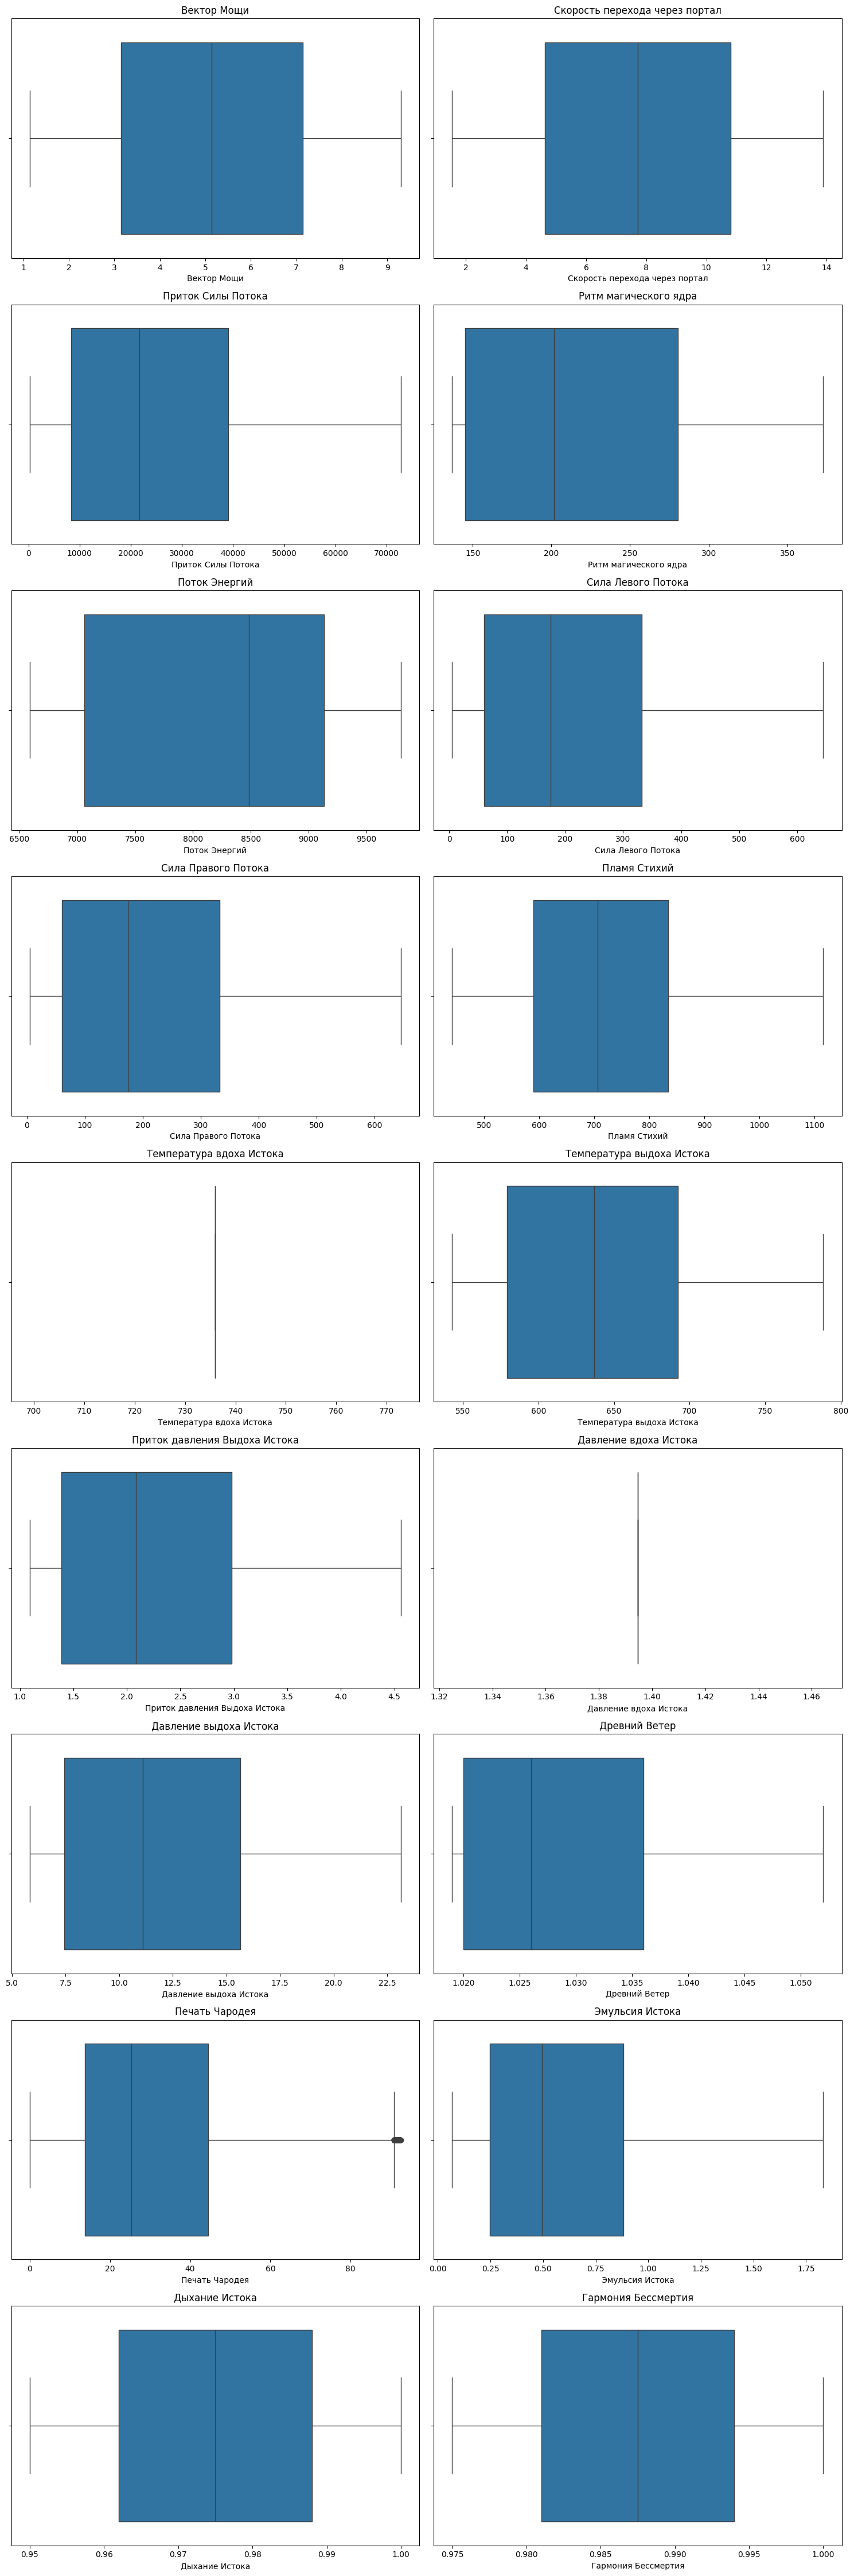

In [7]:
# Получаем список всех числовых столбцов
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Определяем количество строк и столбцов для подграфиков
num_columns = 2
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Округление вверх

# Создаем подграфики
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Плоты для каждого числового столбца
for i, column in enumerate(numeric_columns):
    ax = axes[i // num_columns, i % num_columns]  # Определяем текущий подграфик
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)

# Убираем пустые подграфики, если есть
for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Построим графики выбросов, по которым можем заметить, что они есть только в столбце "Печать Чародея".

**Обработка выбросов**

In [8]:
# Функция для подсчета выбросов
def count_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_counts[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outlier_counts

# Проверка выбросов
outliers_before = count_outliers(df)
print("Количество выбросов до замены:")
print(outliers_before)

Количество выбросов до замены:
{'Вектор Мощи': 0, 'Скорость перехода через портал': 0, 'Приток Силы Потока': 0, 'Ритм магического ядра': 0, 'Поток Энергий': 0, 'Сила Левого Потока': 0, 'Сила Правого Потока': 0, 'Пламя Стихий': 0, 'Температура вдоха Истока': 0, 'Температура выдоха Истока': 0, 'Приток давления Выдоха Истока': 0, 'Давление вдоха Истока': 0, 'Давление выдоха Истока': 0, 'Древний Ветер': 0, 'Печать Чародея': 192, 'Эмульсия Истока': 0, 'Дыхание Истока': 0, 'Гармония Бессмертия': 0}


Также найти выбросы и их количество можем при помощи функции т.е. значения, которые лежат ниже 25% и выше 75%.
Аналогично с тем, что мы заметили на графиках, можем сказать, что выбросы есь только у столбца "Печать Чародея" (192).
Выбросов не очень много, поэтому их можно либо удалить либо заменить (модой медианной или средним значением) для того, чтобы понять каким именно значением лучше заменить построим гистрограмму данного столбца.
Также можно удалить данный столбец если он не влияет на изменение данных

<Axes: >

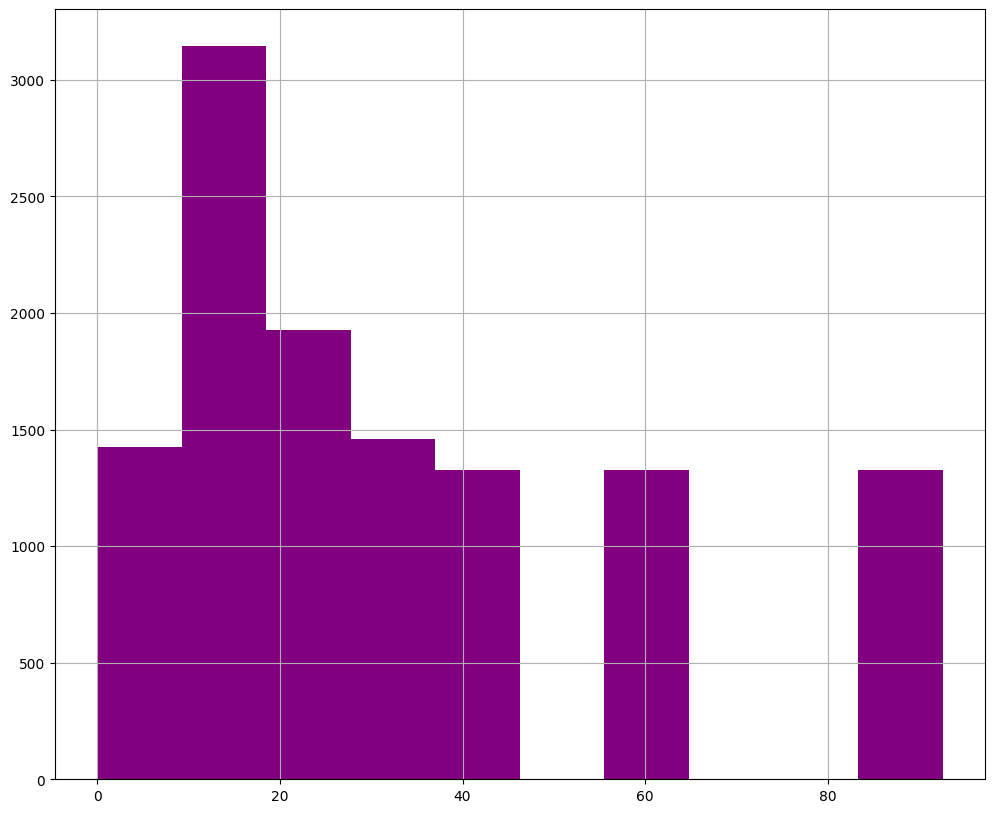

In [9]:
# Строим гистограммы для числовых признаков
df['Печать Чародея'].hist(figsize=(12, 10), color='purple')

На гистограмме значения смещены к левому краю, это указывает на *правостороннее (положительное) смещение* распределения.
В данном случае выбросы будет лучше заменить медаинной или удалить.

**Обработка пропусков и дубликатов**

In [10]:
# Нахождение столбцов с одним уникальным значением, т.е. константы
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Столбцы с одним значением: ", constant_columns)


Столбцы с одним значением:  ['Температура вдоха Истока', 'Давление вдоха Истока']


Также проверим, есть ли столбцы, в которых всего одно значение. 
Видим, что такие столбцы есть (Температура вдоха Истока, Давление вдоха Истока). Их можно удалить т.к. они никак не будут влиять на изменение "Гармонии Бессмертия"

In [11]:
# Пропущенные значение
df.isnull().sum()

Вектор Мощи                          0
Скорость перехода через портал       0
Приток Силы Потока                   0
Ритм магического ядра                0
Поток Энергий                        0
Сила Левого Потока                   0
Сила Правого Потока                  0
Пламя Стихий                         0
Температура вдоха Истока             0
Температура выдоха Истока         9547
Приток давления Выдоха Истока        0
Давление вдоха Истока                0
Давление выдоха Истока               0
Древний Ветер                     9547
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
Гармония Бессмертия                  0
dtype: int64

Проверим количество пустых значений (знаем, что они будут только в двух столбца, которые мы сделали числовыми).
Количество пропущенных значений составлет примерно 80% от всех данных, поэтому необходимо удалить данные столбцы т.к. на основе их изменений мы не сможем предсказать изменения "Гармонии Бессмертия" 

In [12]:
num_duplicates = df.duplicated().sum()

# Вывод количества дубликатов
print("Количество пропусков: ", num_duplicates)

Количество пропусков:  0


Проверим данные на дубликаты.

Дубликатов нет.

In [13]:
# Вычисление 1-го и 3-го квартилей
Q1 = df['Печать Чародея'].quantile(0.25)
Q3 = df['Печать Чародея'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Вычисление медианы
median_value = df['Печать Чародея'].median()

# Замена выбросов на медиану
df['Печать Чародея'] = np.where(
    (df['Печать Чародея'] < lower_bound) | (df['Печать Чародея'] > upper_bound),
    median_value,
    df['Печать Чародея']
)


Так как выбросы только у столбца "Печать Чародея", то будем заменять только значения данного столбца.

Заменим выбросы, которые нашли ранее, на медиану.

**Создание новых признаков**

In [14]:
# Добавление новых данных

# Общая сила потоков
df['Общая Сила Потока'] = df['Сила Левого Потока'] + df['Сила Правого Потока']

# Суммарная сила потоков
df['Суммарная Сила Потоков'] = df['Сила Левого Потока'] + df['Сила Правого Потока'] + df['Приток Силы Потока'] 

# Общая сила ядра
df['Общая Сила Ядра'] = df['Ритм магического ядра'] * df['Приток Силы Потока']

# Общее давление
df['Общее Давление'] = df['Приток давления Выдоха Истока'] + df['Давление выдоха Истока']

# Магическая производительность
df['Магическая Производительность'] = df['Скорость перехода через портал'] / df['Эмульсия Истока']

# Эффективность ядра
df['Эффективность Ядра'] = df['Общая Сила Ядра'] / df['Эмульсия Истока']

# Магическая мощность
df['Магическая Мощность'] = (df['Пламя Стихий'] + df['Температура вдоха Истока']) / 2

# Степень износа магических источников
df['Степень Износа Магических Источников'] =df['Дыхание Истока']/df['Гармония Бессмертия'] 

# Расхождение в стабильности магии
df['Расхождение В Стабильности Магии'] = abs(df['Дыхание Истока']-df['Гармония Бессмертия'])

# Баланс угасания
df['Баланс Угасания'] = (df['Дыхание Истока']-df['Гармония Бессмертия'])/df['Скорость перехода через портал']


Объединим некоторые значения для уменьшения объема и улучшения производительности анализа. Некоторые столбцы удалим при рассмотрении матрицы корреляции, чтобы избужать изыточности  данных.

**Удаление столбцов с большим количеством пропусков**

In [15]:
# Удаление столбцов с большим количеством пропусков
df.drop(columns='Древний Ветер', inplace=True)
df.drop(columns='Температура выдоха Истока', inplace=True)

print("Удаленные столбцы:", constant_columns)

Удаленные столбцы: ['Температура вдоха Истока', 'Давление вдоха Истока']


Удалим столбцы с большим количеством пустых значений.

In [16]:
# Удаление столбцов с единственным значением
df.drop(columns=constant_columns, inplace=True)

print("Удаленные столбцы:", constant_columns)


Удаленные столбцы: ['Температура вдоха Истока', 'Давление вдоха Истока']


Удалим столбцы с одним уникальным значением

# 4. Статистический анализ

**Корреляционный анализ**

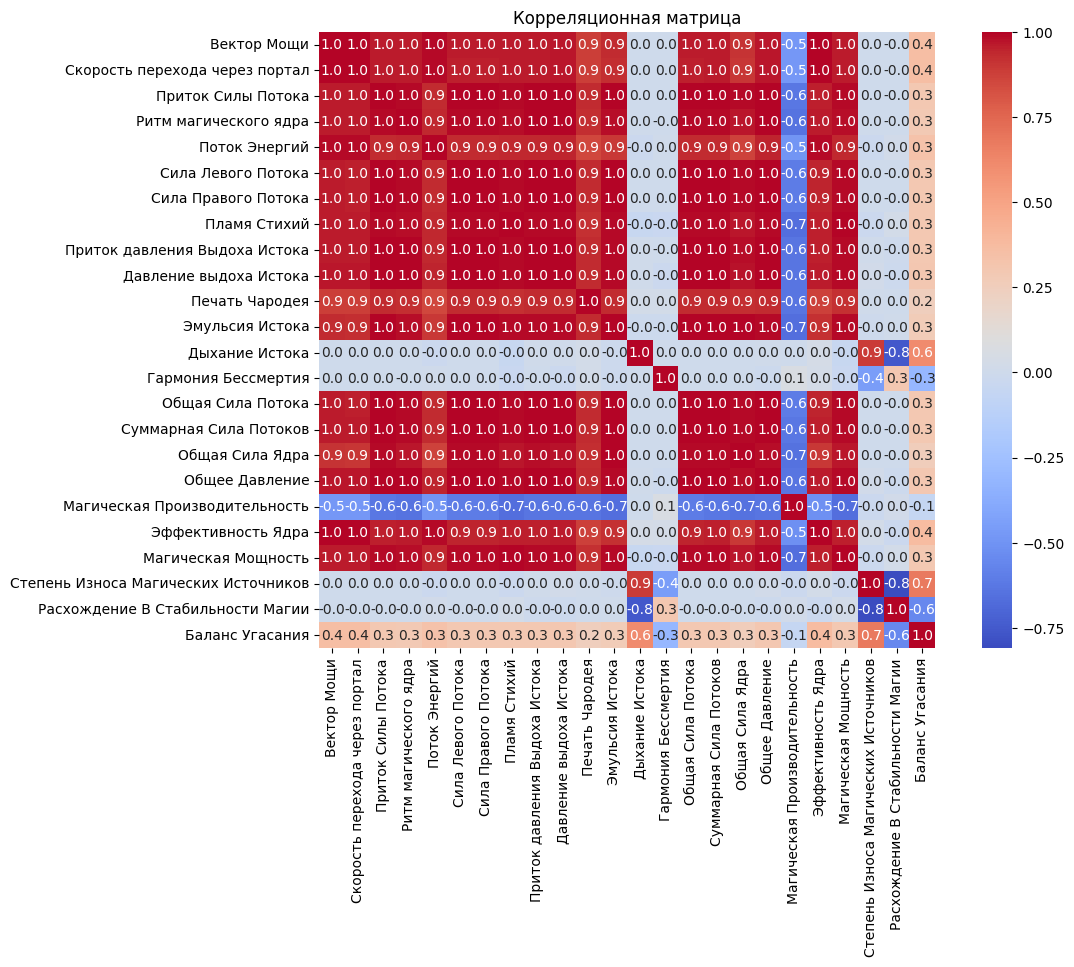

                               Параметр 1  \
0          Скорость перехода через портал   
1                      Приток Силы Потока   
2                      Приток Силы Потока   
3                   Ритм магического ядра   
4                   Ритм магического ядра   
..                                    ...   
150                   Магическая Мощность   
151                   Магическая Мощность   
152                   Магическая Мощность   
153  Степень Износа Магических Источников   
154      Расхождение В Стабильности Магии   

                               Параметр 2  Корреляция  
0                             Вектор Мощи    0.999915  
1                             Вектор Мощи    0.961025  
2          Скорость перехода через портал    0.958243  
3                             Вектор Мощи    0.962090  
4          Скорость перехода через портал    0.960412  
..                                    ...         ...  
150                       Общая Сила Ядра    0.968488  
151        

In [17]:
## Корреляционная матрица
correlation_matrix = df.corr()
correlation_matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

def find_high_correlation_pairs(df, threshold=0.8):
    # Вычисляем корреляционную матрицу
    correlation_matrix = df.corr()
    
    # Список для хранения пар признаков
    high_corr_pairs = []

    # Проходим по корреляционной матрице
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            # Проверяем, превышает ли абсолютное значение корреляции порог
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

    return high_corr_pairs

# Найдем пары переменных, которые сильно коррелируют друг с другом
high_corr_pairs = find_high_correlation_pairs(df, threshold=0.8)

# Выводим результаты
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Параметр 1', 'Параметр 2', 'Корреляция'])
print(high_corr_df)

По матрице можем заметить, что много параметров сильно коррелируют друг с другом.

Это может приводить к:
 - Мультиколлинеарности, при которой может возникнуть нестабильность модели, а коэффициенты могут стать трудно интерпретируемыми.
 - Переобучение, т.е. модель может слишком хорошо адаптироваться к тренеровочным данным, но плохо обобщаться на новых.
 - Вычислительная сложность, т.е. увеличение времени и ресурсов, необходимых для обучения и предсказания модели
 - Избыточность данных, т.е. когда один признак выражается через другие.

Чтобы модель работала корректно, необходимо удалить некоторые столбцы, чтобы избавиться от высокой корреляцией.

**Удаление высококоррелированных признаков**

Удаленные признаки: set()


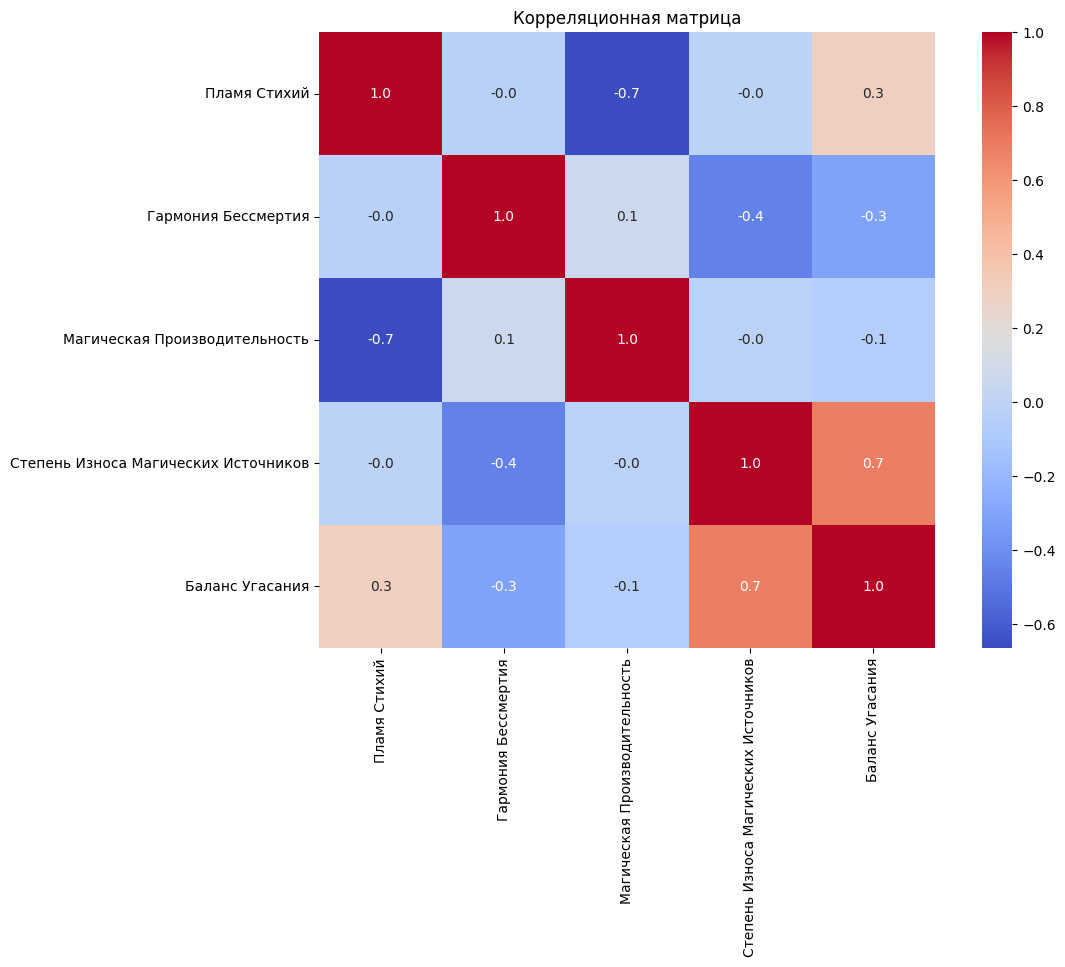

Empty DataFrame
Columns: [Признак 1, Признак 2, Корреляция]
Index: []


In [46]:

# 'Гармония Бессмертия' — целевая переменная
target_variable = 'Гармония Бессмертия'

def remove_highly_correlated_features(df, target_variable, threshold=0.8):
    # Вычисляем корреляционную матрицу
    corr_matrix = df.corr()
    
    # Список для хранения признаков для удаления
    features_to_drop = set()

    # Поиск пар признаков с высокой корреляцией
    high_corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])
                       for i in range(len(corr_matrix.columns))
                       for j in range(i)
                       if abs(corr_matrix.iloc[i, j]) > threshold]

    # Выбор и удаление одного из признаков в каждой паре
    for feature1, feature2 in high_corr_pairs:
        if feature1 != target_variable and feature2 != target_variable:
            # Выбираем признак с наименьшей корреляцией с целевой переменной
            if abs(corr_matrix.loc[feature1, target_variable]) < abs(corr_matrix.loc[feature2, target_variable]):
                features_to_drop.add(feature1)
            else:
                features_to_drop.add(feature2)

    # Удаляем выбранные признаки
    df.drop(columns=features_to_drop, inplace=True)
    
    return df, features_to_drop

def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, fmt='.1f', cmap='coolwarm', square=True)
    plt.title('Корреляционная матрица')
    plt.show()

def find_high_correlation_pairs(df, threshold=0.8):
    correlation_matrix = df.corr()
    high_corr_pairs = [
        (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
        for i in range(len(correlation_matrix.columns))
        for j in range(i)
        if abs(correlation_matrix.iloc[i, j]) > threshold
    ]
    return high_corr_pairs

# Применяем функцию для удаления высококоррелированных признаков
cleaned_df, dropped_features = remove_highly_correlated_features(df, target_variable)

# Выводим результаты
print("Удаленные признаки:", dropped_features)

# Визуализируем корреляционную матрицу
plot_correlation_matrix(cleaned_df)

# Находим пары с высокой корреляцией
high_corr_pairs = find_high_correlation_pairs(cleaned_df, threshold=0.8)

# Выводим результаты
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Признак 1', 'Признак 2', 'Корреляция'])
print(high_corr_df)

Удалим сильно коррелирующие столбцы т.к. высокая корреляция может влиять на прогнозируемость.
Создадим функцию, которая находит параметры с высокой корреляцией и удаляет один из них, проверяя, чтобы данный столбец не был целевым параметром или не коррелировал с ним.
Остались параметры, с которыми целевая функция коррелировала больше всего.

**Анализ мультиколлинеарности**

In [19]:

X = df.drop(columns=['Гармония Бессмертия']) 
X = add_constant(X)  # Добавляем константу для расчета VIF

# Вычисляем VIF для каждой переменной
vif_data = pd.DataFrame()
vif_data["Переменная"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Удаляем строку с константой
vif_data = vif_data[vif_data["Переменная"] != "const"]

# Выводим результаты
print(vif_data)

# Определение переменных с высоким VIF
high_vif = vif_data[vif_data["VIF"] > 5]  # Можно использовать 10 как более строгий порог
print("Переменные с высоким VIF:")
print(high_vif)

                             Переменная       VIF
1                          Пламя Стихий  2.452016
2         Магическая Производительность  2.014273
3  Степень Износа Магических Источников  2.254835
4                       Баланс Угасания  2.567986
Переменные с высоким VIF:
Empty DataFrame
Columns: [Переменная, VIF]
Index: []


Провеми полученные данные на мультиколлинеарность.

Получили фактор инфляции дисперсии (VIF), т.е. статический показатель, который измеряет степень мультиколлинеарности в наборе независимых переменных в модели регрессии.

Значения VIF могут быть:
1. VIF = 1. Корреляции нет 
2. 1< VIF <5. Умеренная корреляция
3. VIF >= 5. Высокая корреляция
4. VIF >= 10. Очень высокая корреляция

В нашем случае у всех признаков умеренная корреляция, поэтому в дальнейшем изменении данных нет смысла.

# 5. Подготовка данных к моделированию

**Разделение данных на обучающую и тестовую выборки**

Импортируем библиотеки, необходимые для моделирования

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

Разобьем данные на тренировочную и тестовую выборки и зададим целевую переменну.


In [21]:
X = df.drop(columns='Гармония Бессмертия')
y = df['Гармония Бессмертия']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Разделим данные на матрицу признаков (независимые переменные) и вектор целевой переменной (зависимую переменную). 

Создадим матрицу признаков *(X)*, которая содержит все столбцы df, кроме "Гармонии Бессмертия".
В данном случае 'Гармония Бессмертия' — это целевая переменная, которую мы будем предсказывать, поэтому её нужно исключить из матрицы признаков *X*.

Создадим вектор целевой переменной *y*, который содержит значения столбца 'Гармония Бессмертия' из df.
Вектор *y* содержит значения, которые мы будем предсказывать с помощью модели. Это целевая переменная, которую модель будет пытаться объяснить с помощью признаков из матрицы *X*.

Разделим данные на тренировочный и тестовый наборы.

**Тренировочный набор** используется для обучения модели

**Тестовый набор** используется для оценки производительности модели. После обучения модели на тренировочном наборе, будем проверять на нем, насколько хорошо модель обобщает новые данные, которые не видела во время обучения.

**test_size=0.2** указывает, что 20% данных будут использоваться для тестового набора, а 80% — для тренировочного.

**random_state=42** задает начальное значение для генератора случайных чисел, чтобы разделение данных было детерминированным и воспроизводимым.

# 6. Моделирование


Рассмотрим несколько моделей для сравнения:
- **Линейная регрессия**

    Она является одним из самых простых и интуитивно понятных алгоритмов; коэффициенты модели легко интерпретируются; работает быстро и эффективно на больших объемах данных.

   Из недостатков данного алгоритма можно отметить линейность, т.е линейную зависимость между признаками и целевой переменной, что не всегда соответствует реальным данным; также на результаты данной модели могут сильно влиять выбросы.

   
- **Решающие деревья**

    Может моделировать нелинейные зависимости; деревья легко интерпретируются и визуализируются; также модель хорошо работает с числовыи и категориальными признаками.

  Однако она легко переобучается, особенно если деревья слишком глубокие; ее нестабильность проявляется в том, что даже небольшие изменения в данных могут привести к значительным изменения в структуре дерева.

- **Метод ближайших соседей**

    Является достаточно простым и интуитивно понятным алгоритмовм; может моделировать сложные зависимости без предположений о форме данных.

    Поиск ближайших соседей может быть вычеслительно затратным для больших наборов данных; выбросы могут сильно влиять на результаты; требует нормализации данных;

- **Случайные леса**

    Объединение множества деревьев помогает уменьшить переобучение; данная модель может генерировать даже сложные зависимости; также хорошо работает с числовыми и категориальными признаками.

  К недостаткам можно отнести то, что модель является более сложной и медленной, по сравнению, например, с линейной регрессией; ее более сложно интерпретировать, в отличие от решающих деревьев.

- **Градиентный бустинг**

    Данный алгоритм часто показывает высокую точность на многих задачах; может моделировать сложные зависимости; хорошо работает с числовыми и категориальными признаками;

  Может быть вычислительно затратным; если не контролировать параметры, такие как глубина деревьев и количество итераций, модель может переобучиться; для достижения хороших результатов требуется тщательнаяя настройка гиперпараметров;

  
- **Catboost**

    Автоматически обрабатывает категориальные признаки, не требуя предварительной обработки данных; использует методы, такие как ordered boosting и oblivious trees для уменьшения переобучения; оптимизирован для работы с большими объемами данных и поддерживает параллельные вычисления и распределенное обучение; предоставляет инструменты для интерпретации моделей, такие как feature importance и SHAP values.

  К недостаткам можно отнести то, что алгоритм может быть вычислительно затратным для очень больших наборов данных; для достижения хороших результатов требуется тщательная настройка гиперпараметров.


Рассматриваемые модели охватывают широкий спектр подходов к решению задач регрессии.

Будем создавать экземпляры различных моделей. Они будут использоваться для обучения на тренировочных данных и для предсказания на тестовых данных.

Обучим модель на тренировочных данных с помощью метода fit. 

После обучения модели на тренировочных данных, оценим, насколько хорошо модель обобщает новые данные, которые она не видела во время обучения. Сделаем это с помощью предсказания на тестовых данных.

Вычислим среднеквадратичную ошибку (MSE) между фактическими значениями целевой переменной на тестовых данных (y_test) и предсказанными значениями (y_pred).

Также вычислим коэффициент детерминации (score) между фактическими значениями целевой переменной на тестовых данных (y_test) и предсказанными значениями (y_pred).

Определим сетку гиперпараметров, которые будут использоваться для поиска лучших параметров модели. И при помощи класса GridSearchCV найдем лучшие гиперпараметры с помощью кросс-валидации.

``Линейная регрессия``

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[0.98424542 0.98074033 0.98335817 ... 0.98728015 0.99037663 0.985193  ]


Линейная регрессия — это один из самых простых и широко используемых алгоритмов машинного обучения для задач регрессии.

Создаим экземпляр модели линейной регрессии с помощью класса LinearRegression. 



In [23]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print('Score на тренировочных данных = ', round(model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(model.score(X_test, y_test), 4))

Mean Squared Error: 4.596342272153693e-05
Score на тренировочных данных =  0.2076
Score на тестовых данных =  0.1934



**MSE:** Достаточно маленькое значение, что может указывать на хорошую производительность модели.

**R² на тестовых данных:** 0.1934 указывает на то, что модель объясняет около 19.34% вариации данных. Что может указывать на недостаточную точность модели.

**R² на тренировочных данных:**  0.2076 указывает на то, что модель объясняет около 20.76% вариации данных на тренировочных данных.

В целом, модель показывает низкую объясняющую способность (R²), что может указывать на то, что либо данные сложны для моделирования, либо модель недостаточно сложна для понимания закономерностей в данных. 

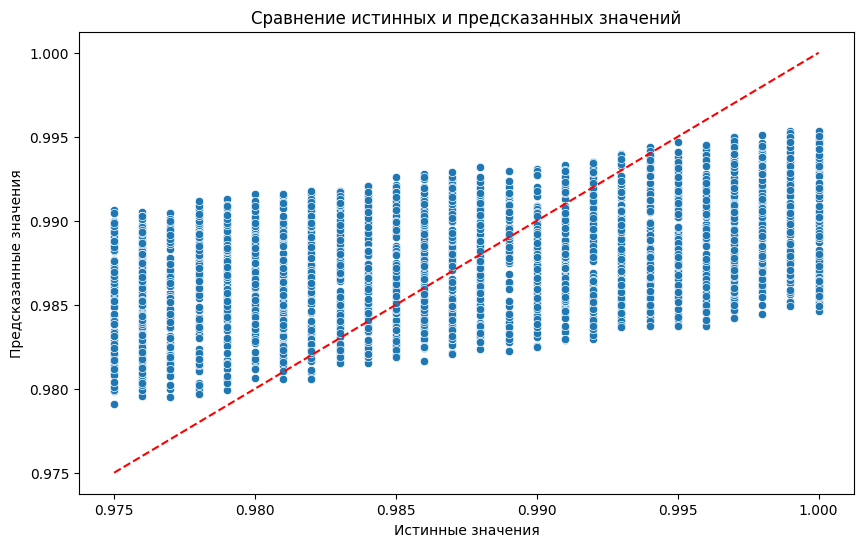

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Точки распределены достаточно далеко от диагонали, это указывает на то, что модель плохо предсказывает истинные значения. 

В этом случае низкое значение R² подтверждает, что модель не очень хорошо обобщает данные.

``Решающие деревья``

In [25]:
model = DecisionTreeRegressor(random_state=42)

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вывод предсказаний
print(y_pred)


[0.987 0.977 0.982 ... 0.985 0.979 0.975]


Решающие деревья — это алгоритмы машинного обучения, которые используются как для задач классификации, так и для задач регрессии. Они представляют собой древовидную структуру, где каждый внутренний узел представляет проверку на признаке, каждая ветвь представляет результат проверки, а каждый лист (конечный узел) представляет предсказание.

In [26]:
# Определение сетки гиперпараметров
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Предсказание на тестовых данных с использованием лучшей модели
y_pred = grid_search.predict(X_test)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


GridSearchCV будет перебирать все комбинации гиперпараметров, указанных в param_grid, и выбирает ту, которая дает наилучший результат на основе выбранной метрики (в данном случае, отрицательной среднеквадратичной ошибки).

Выбор гиперпараметров max_depth, min_samples_split и min_samples_leaf позволяет контролировать сложность и устойчивость модели решающего дерева к переобучению.

Задаем эти параметры для предотвращение переобучения и упрощение модели

**max_depth** — это максимальная глубина дерева, то есть максимальное количество узлов от корня до листа.
 - None: Без ограничения глубины дерево может расти до тех пор, пока не будут исчерпаны все возможности для разделения данных.
 - 10, 20, 30: Эти значения представляют собой разные уровни сложности модели. 10 — относительно небольшая глубина, 20 — средняя, 30 — большая.

**min_samples_split** — это минимальное количество объектов, необходимых для разделения внутреннего узла.

- 2: Стандартное значение, которое позволяет дереву разделять узлы даже с небольшим количеством объектов.

- 5, 10: Эти значения представляют собой разные уровни ограничения на разделение узлов. 5 — умеренное ограничение, 10 — более строгое

**min_samples_leaf** — это минимальное количество объектов, необходимых для того, чтобы узел стал листом
- 1: Стандартное значение, которое позволяет создавать листы с одним объектом.

- 2, 4: Эти значения представляют собой разные уровни ограничения на создание листов. 2 — умеренное ограничение, 4 — более строгое.



In [27]:
# Вычисление метрик качества модели
mse = mean_squared_error(y_test, y_pred)

# Вывод метрик
print(f"Mean Squared Error: {mse}")

print('Score на тренировочных данных = ', round(model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(model.score(X_test, y_test), 4))

Mean Squared Error: 6.686678898313881e-06
Score на тренировочных данных =  1.0
Score на тестовых данных =  0.8739


**MSE** Очень маленькое значение, что может указывать на хорошую производительность модели, но важно учитывать масштаб целевой переменной.

**R² на тренировочных данных:** Значение 1.0 указывает на идеальное объяснение данных на тренировочных данных. Обнако это также может указывать на переобучение, т.к. модель "запомнила" тренировочные данные, а не выявила закономерности.

**R² на тестовых данных:** Значение 0.8739 указывает на очень высокую объясняющую способность модели на тестовых данных. Что может указывать на то, что модель хорошо обобщает данные.

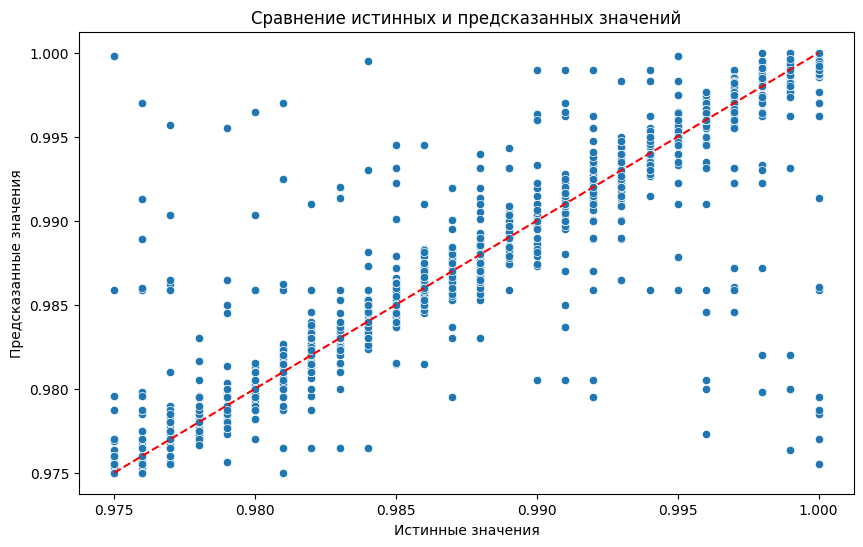

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

На графике точки расположены далеко от диагонали, что может указывать на то, что модель плохо предсказывает истинные значения, несмотря на низкое значение MSE и высокое значение R² на тестовых данных.
Это может указывать на неравномерное распределение данных, т.е. модель может хорошо предсказывать значения в определенных диапазонах, но плохо — в других.

В данном случае низкое значение MSE и высокое значение R² могут быть результатом совпадения.

``Метод ближайших соседей``

In [29]:
# Создание экземпляра модели KNN
model = KNeighborsRegressor(n_neighbors=5)

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вывод предсказаний
print(y_pred)


[0.989  0.9878 0.989  ... 0.9844 0.9768 0.982 ]


Метод ближайших соседей (K-Nearest Neighbors, KNN) — это простой и интуитивно понятный алгоритм машинного обучения, который используется как для задач классификации, так и для задач регрессии. Основная идея KNN заключается в том, чтобы предсказать значение для нового объекта на основе значений его ближайших соседей в пространстве признаков.

In [30]:
# Определение сетки гиперпараметров
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Манхэттенское расстояние, 2: Евклидово расстояние
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Предсказание на тестовых данных с использованием лучшей модели
y_pred = grid_search.predict(X_test)

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


Настраиваем гиперпараметры

**n_neighbors** - количество ближайших соседей, которые будут учитываться при предсказании.

Проверяем какое количество соседей (3,5,7,9) дает лучший результат. Чем больше k, тем более гладкое и менее чувствительное к шуму решение, однако может быть менее точное.

**weights** - способ взевшшивания соседей при предсказании
- uniform - все соседи имеют одинковый вес
- distance - вес соседа обратно пропорционален расстоянию до него. Ближайшие соседи имеют больший вес.

**p** - параметр метрики расстояния.
- 1 - Манхэттенское расстояние (сумма абсолютных разностей по координатам).
- 2 - Евклидово расстояние (квадратный корень из суммы квадратов разностей по координатам).

In [31]:

# Вычисление метрик качества модели
mse = mean_squared_error(y_test, y_pred)


# Вывод метрик
print(f"Mean Squared Error: {mse}")

print('Score на тренировочных данных = ', round(model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(model.score(X_test, y_test), 4))

Mean Squared Error: 2.256486094493804e-05
Score на тренировочных данных =  0.6454
Score на тестовых данных =  0.4227


**MSE:** достаточно мал, что указывает на то, что модель делает очень точные предсказания. Это может свидетельствовать о хорошей производительности модели.

**R²** на тренировочных данных: Значение 0.6454 указывает на то, что модель объясняет около 64.54% вариации в тренировочных данных. Это означает, что модель имеет умеренную способность объяснять данные, но есть возможности для улучшения.

**R²** на тестовых данных: Значение 0.4227 указывает на то, что модель объясняет около 42.27% вариации в тестовых данных. Это значительно ниже, чем на тренировочных данных, что может свидетельствовать о переобучении модели.

В целом, модель показывает хорошие результаты на тренировочных данных, однако заметное снижение R² на тестовых данных

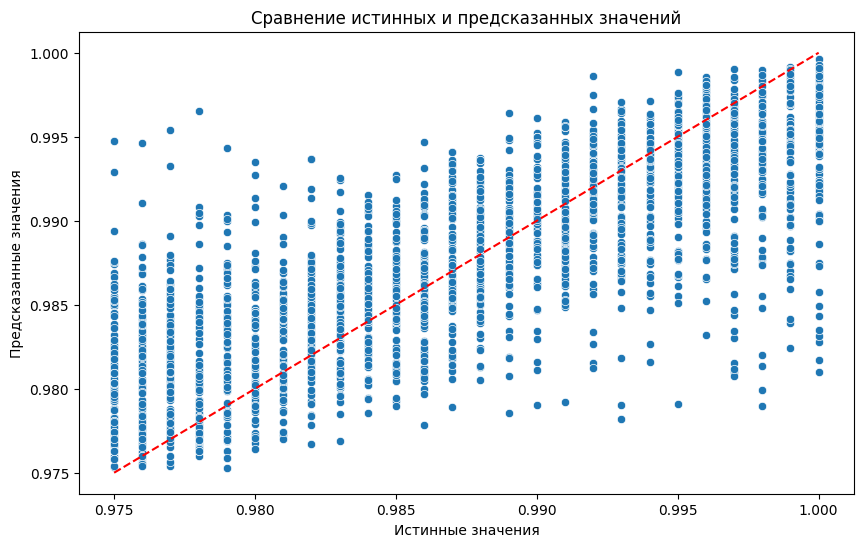

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Значения достаточно сильно разбросаны от прямой, что может указывать на то, что модель не полностью объясняет вариацию данных.
Возможно, это связано с нелинейностью данных, с которыми KNN справяется не очень хорошо

``Случайный лес``

In [34]:

# Создание экземпляра модели случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вывод предсказаний
print(y_pred)


[0.98685 0.97698 0.98188 ... 0.98605 0.97779 0.97565]


Случайный лес — это ансамблевый метод машинного обучения, который состоит из множества решающих деревьев. Каждое дерево в лесу обучается на случайной подвыборке данных, и предсказание модели делается путем усреднения (для задач регрессии) или голосования (для задач классификации) предсказаний всех деревьев.

In [35]:
# Определение сетки гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Предсказание на тестовых данных с использованием лучшей модели
y_pred = grid_search.predict(X_test)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Задаем те же гиперпараметры, что и для модели решающих деревьев, но добавим количество деревьев

**n_estimators**— это количество деревьев в лесу.
    
50, 100, 200: Значения представляют собой разные уровни сложности модели. 
- 50 — относительно небольшое количество деревьев,
- 100 — среднее,
- 200 — большое.

In [36]:
# Вычисление метрик качества модели
mse = mean_squared_error(y_test, y_pred)
# Вывод метрик
print(f"Mean Squared Error: {mse}")
print('Score на тренировочных данных = ', round(model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(model.score(X_test, y_test), 4))

Mean Squared Error: 3.201773125261958e-06
Score на тренировочных данных =  0.9913
Score на тестовых данных =  0.9441


**MSE:** маленькое значение, что может указывать на хорошую производительность модели

**R² на тренировочных данных:** 0.9913 указывает на очень высокую объясняющую способность модели на тренировочных данных. Однако это может также указывать на переобучение.

**R² на тестовых данных:** 0.9441 указывает на очень высокую объясняющую способность модели на тестовых данных. Что может указывать на то, что модель хорошо обобщает данные.

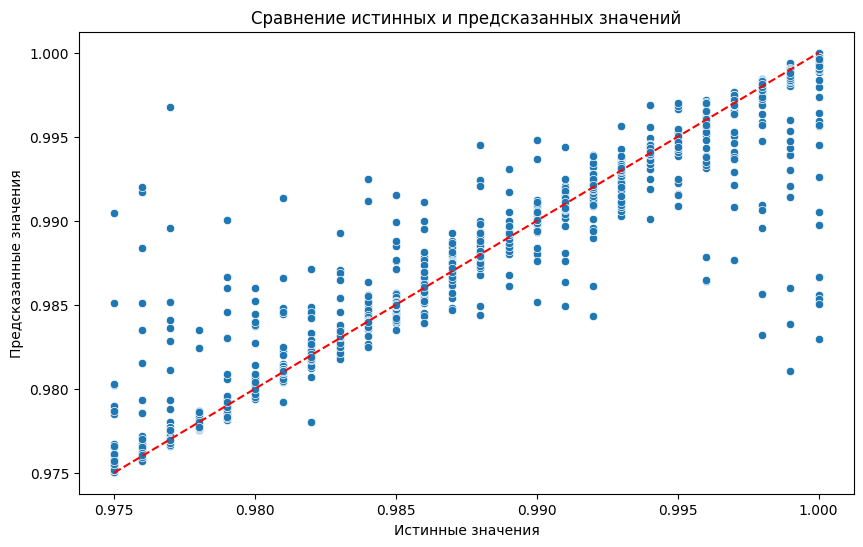

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

На графике большинство точек расположены достаточно близко к прямой, это указывает на то, что модель хорошо предсказывает истинные значения. 

Хоть значениее R² на тренировочных ниже чем у Решающего дерева, однако на графике видно, что данная модель лучше предсказывает значения.

``Градиентный бустинг``

In [38]:

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вывод предсказаний
print(y_pred)


[0.98605543 0.97847893 0.98234946 ... 0.98691854 0.98500231 0.98124743]


Градиентный бустинг (Gradient Boosting) — это мощный алгоритм машинного обучения, который используется для задач регрессии и классификации. Основная идея градиентного бустинга заключается в последовательном построении моделей, где каждая новая модель пытается исправить ошибки предыдущих моделей. Вместо того чтобы обучать модели независимо, градиентный бустинг строит их последовательно, так что каждая следующая модель фокусируется на ошибках предыдущих.

In [39]:
# Определение сетки гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Предсказание на тестовых данных с использованием лучшей модели
y_pred = grid_search.predict(X_test)


Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Выставляем параметры аналогичные модели Случаного леса, и добавляем щшаг обучения.

**learning_rate** - шаг обучения, который определяет, насколько сильно каждое новое дерево влияет на общую модель.
- 0,01 - не сильно
- 0,1 - умеренно
- 0,2 - сильно

In [40]:

# Вычисление метрик качества модели
mse = mean_squared_error(y_test, y_pred)

# Вывод метрик
print(f"Mean Squared Error: {mse}")

print('Score на тренировочных данных = ', round(model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(model.score(X_test, y_test), 4))

Mean Squared Error: 1.8271122224337822e-06
Score на тренировочных данных =  0.7414
Score на тестовых данных =  0.7279


**MSE:** мал, что указывает на то, что модель делает очень точные предсказания. 

**R² на тренировочных данных:** Значение 0.7414 указывает на то, что модель объясняет около 74.14% вариации в тренировочных данных. Это означает, что модель имеет хорошую способность объяснять данные и может эффективно захватывать зависимости между признаками и целевой переменной.

**R² на тестовых данных:**  Значение 0.7279 указывает на то, что модель объясняет около 72.79% вариации в тестовых данных. Это также является хорошим показателем, так как модель сохраняет свою производительность на невидимых данных, что свидетельствует о ее обобщающей способности.
Модель градиентного бустинга показывает неплохие результаты как на тренировочных, так и на тестовых данных, что указывает на ее неплохую обобщающую способность. 

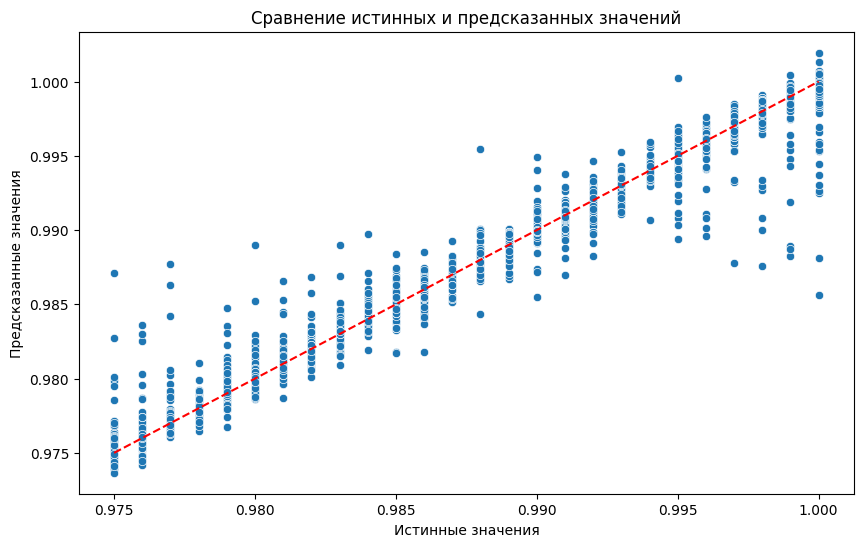

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Если на графике остатков большинство точек расположены близко к прямой, это указывает на то, что модель хорошо объясняет данные и не имеет систематических ошибок.


``CatBoost``

CatBoost — это мощный алгоритм градиентного бустинга, разработанный компанией Яндекс. Он предназначен для решения задач регрессии и классификации и обладает рядом преимуществ по сравнению с другими алгоритмами градиентного бустинга, такими как XGBoost и LightGBM.

In [42]:


# Определение сетки гиперпараметров
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=CatBoostRegressor(verbose=0, random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Обучение модели с поиском лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Best parameters: {grid_search.best_params_}")

# Предсказание на тестовых данных с использованием лучшей модели
y_pred = grid_search.predict(X_test)



Best parameters: {'depth': 7, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.2}


Создадим модель CatBoost и настроим гиперпараметры
**iterations** - Количество итераций (деревьев) в модели.
Этот параметр определяет, сколько деревьев будет построено в процессе бустинга. Чем больше итераций, тем более сложная модель может быть построена, но это также может привести к переобучению.
**depth** - Максимальная глубина каждого дерева.
Этот параметр контролирует сложность каждого дерева. Большая глубина может привести к более точной модели, но также увеличивает риск переобучения.

**l2_leaf_reg** -  Параметр регуляризации L2, который контролирует штраф за сложность модели.
Большие значения l2_leaf_reg добавляют больший штраф за сложность модели, что может помочь предотвратить переобучение. Меньшие значения позволяют моде

In [43]:
# Вычисление метрик качества модели
mse = mean_squared_error(y_test, y_pred)

# Вывод метрик
print(f"Mean Squared Error: {mse}")
print('Score на тренировочных данных = ', round(model.score(X_train, y_train), 4))
print('Score на тестовых данных = ', round(model.score(X_test, y_test), 4))

Mean Squared Error: 3.4505908131347156e-06
Score на тренировочных данных =  0.7414
Score на тестовых данных =  0.7279


**MSE:** очень мал, что  указывает на то, что модель делает очень точные предсказания. Это может свидетельствовать о хорошей производительности модели.

**R² на тренировочных данных:** Значение 0.7414 указывает на то, что модель объясняет около 74.14% вариации в тренировочных данных. Это означает, что модель хорошо захватывает зависимости между признаками и целевой переменной, что свидетельствует о ее эффективности.

**R² на тестовых данных:**  Значение 0.7279 указывает на то, что модель объясняет около 72.79% вариации в тестовых данных. Это также является хорошим показателем, так как модель сохраняет свою производительность на невидимых данных, что подтверждает ее обобщающую способность.

Модель CatBoost показывает неплохие результаты как на тренировочных, так и на тестовых данных, что указывает на ее неплохую обобщающую способность. 

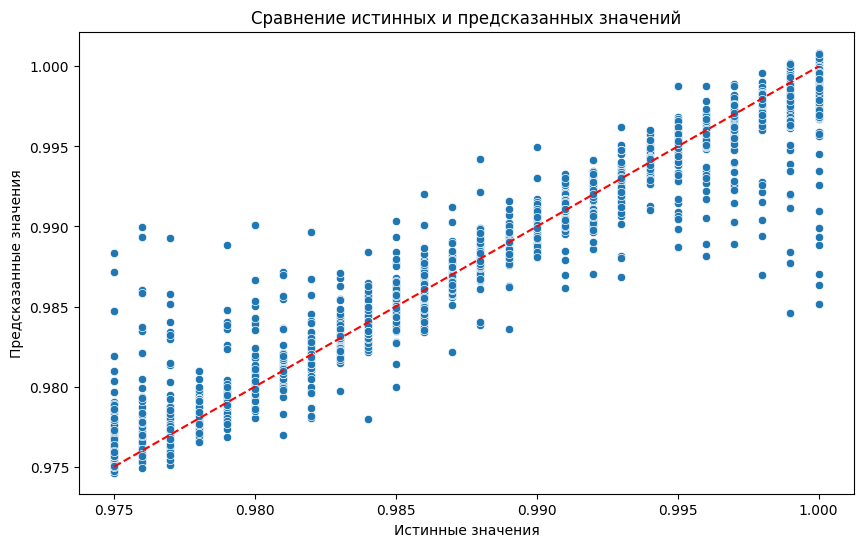

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

Если на графике остатков большинсво точек расположено близко к прямой, это указывает на то, что модель хорошо объясняет данные и не имеет систематических ошибок. 

## 7. Оценка модели

**Кросс-валидация**

In [45]:

# Применяем кросс-валидацию
cv_random_forest = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5, scoring='r2')
cv_gradient_boosting = cross_val_score(GradientBoostingRegressor(), X_train, y_train, cv=5, scoring='r2')
cv_linear_regression = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')
cv_cat_boost = cross_val_score(CatBoostRegressor(verbose=0), X_train, y_train, cv=5, scoring='r2')
cv_knn = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=5, scoring='r2')
cv_trees = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=5, scoring='r2')

print(f'Кросс-валидация Линейной Регрессии: {round(cv_linear_regression.mean(), 4)}')
print(f'Кросс-валидация Решающих деревьев: {round(cv_trees.mean(), 4)}')
print(f'Кросс-валидация Ближайших соседей: {round(cv_knn.mean(), 4)}')
print(f'Кросс-валидация Случайного леса: {round(cv_random_forest.mean(), 4)}')
print(f'Кросс-валидация Градиентного бустинга: {round(cv_gradient_boosting.mean(), 4)}')
print(f'Кросс-валидация CatBoost: {round(cv_cat_boost.mean(), 4)}')


Кросс-валидация Линейной Регрессии: 0.206
Кросс-валидация Решающих деревьев: 0.8681
Кросс-валидация Ближайших соседей: 0.3634
Кросс-валидация Случайного леса: 0.9316
Кросс-валидация Градиентного бустинга: 0.7238
Кросс-валидация CatBoost: 0.9259


**Итоги по кросс-валидации:**

1. Линейная регрессия
   - Низкое значение кросс-валидации указывает на то, что модель плохо обощается на новые данные. Это может быть связано с тем, что данные имеют нелинейную зависимость, которую линейная регрессия не может адекватно моделировать
   - Хоть она и является простой и интерпретируемой, а также достаточно быстра в тренировке и предсказании, однако у данной модели низкая производительность по сравнению с другими методами

    *Не подходит для данной задачи, так как она демострирует низкую точность и большую ошибку*
2. Решающие деревья
    - Высокое значение кросс-валиадции указывает на то, что модель хорошо обощается на новые данные. Однако это может являться результатом переобучения.
    - Хорошо справляется с нелинейными зависимости и легко интерпретируема, однако у данной модели склонность к переобучению (очень высокий score на тренировочных данных).
    *Хотя решающие деревья показывают высокую точность, их склонность к переобучению делает их менее надежными для новых данных. Считаю, что она не подходит для решения данной задачи*

3. Метод ближайших соседей
    - Низкое значение кросс-валидации указывает на то, что модель имеет низкую обобщающую способность.
    - Модель проста в реализации. Однако она чуствительна к выбросам и шуму в данных, также требует много памяти для хранения данных
    *Метод ближайших соседей показывает приемлемые результаты, но его чувствительность к шуму и разброс данных ограничивает его применимость.*

4. Случайные леса
    - Очень высокое значение кросс-валидации указывает на то, что модель хорошо обобщается на новые данные. Это может быть результатом хорошей подгонки модели к данным.
    - Высокая точность и устойчивость к переобучению. Алгорим хорошо справляется с нелинейными зависимостями. Необходимо также отметить, что он более сложный в интерпретации и занимает большее время для обучения и предсказания по сравнению с просыми моделями.
    *Случайный лес демонстрирует отличные результаты и является лучшим из вариантов для данной задачи.*

5. Градиентный бустинг
    - Хорошее значение кросс-валидации указывает на то, что модель хорошо обобщается на новые данные.
    - Неплохая точность и способность работать с нелинейными зависимостями. Также, можно отметить гибкость в настройке параметров. Из недостатков стоит отметить большое время тренировки по сравнениб с другими моделями, а также может быть чувствителен к переобучению при неправильнойф настройке.
    *Градиентный бустинг показывает неплохие результаты, но требует тщательной настройки гиперпараметров.*

6. CatBoost
    - Высокое значение кросс-валидации указывает на то, что модель хорошо обобщается на новые данные.
    - Устойчив к переобучению и не требует большого количества предобработки данных. Однако у него более сложная настройка по сравнению с другими методами.
    *CatBoost показывает один из лучших результаты среди всех моделей и является хорошим выбором для данной задачи.*


На основе проведенного анализа, Случайные леса является лучшим выбором для решения задачи регрессии, так как он демонстрирует наивысшую точность и устойчивость к переобучению. CatBoost также показывает отличные результаты и может быть хорошей альтернативой. В то время как линейная регрессия и метод ближайших соседей имеют свои плюсы, их производительность значительно уступает более сложным моделям.

# 8. Итоговый анализ и вывод

В данной работе была поставлена задача разработки модели регрессии для предсказания значения целевой переменной "Гармония Бессмертия" на основе других признаков. Целью было выбрать наилучшую модель, которая обеспечит высокую точность предсказаний и хорошую обобщающую способность на новых данных.

- **Загрузка и обзор данных:** Были загружены данные в DataFrame и проведен первичный анализ, чтобы понять структуру и типы данных.
- **Преобразование типов данных:** Некоторые столбцы требовали преобразования в числовые форматы, что было сделано для корректного анализа.
- **Обработка пропусков:** Были выявлены пропуски в данных и применены методы их обработки, такие как замена на медиану или удаление строк с пропусками, что улучшило качество данных.
- **Обнаружение выбросов:** Используя методы статистического анализа, были выявлены выбросы и принято решение о их обработке, что позволило повысить точность моделей.
- **Удаление ненужных столбцов:** Были исключены столбцы с постоянными значениями и с большим количеством пропусков, что упростило набор данных.

Данные изначально были хорошо структурированы, что значительно упростило процесс их обработки. В наборе не было дубликатов, а количество выбросов оказалось минимальным. Пропуски присутствовали только в двух столбцах, что также способствовало упрощению обработки данных. Такие условия позволили  сосредоточиться на более сложных аспектах анализа и моделирования, не тратя много времени на устранение проблем с качеством данных. Это обеспечило более эффективный и быстрый процесс подготовки данных для дальнейшего анализа и построения моделей.

При попытке построения модели на всех данных, включая сильно коррелирующие признаки, были получены результаты, которые показали, что лучшей моделью оказалась линейная регрессия с R² = 1.0. Это значение указывает на идеальную подгонку, однако оно может быть обманчивым. Высокое значение R² в данном случае свидетельствует о том, что модель переобучилась на тренировочных данных, подстраиваясь под шум и специфические особенности выборки, что снижает ее способность обобщать на новых данных.

С целью повышения надежности моделей и предотвращения переобучения было принято решение удалить сильно коррелирующие признаки. Это позволило уменьшить мультиколлинеарность, улучшить интерпретируемость модели и повысить ее устойчивость к изменениям в данных. Удаление таких признаков помогло сосредоточиться на наиболее значимых переменных, что в конечном итоге способствовало созданию более обобщающей и надежной модели.

Были рассмотрены и обучены следующие модели:

- Линейная регрессия

- Решающие деревья

- Случайный лес

- Метод ближайших соседей

- Градиентный бустинг

- CatBoost

Каждая модель была оценена по метрикам MSE (Mean Squared Error) и R^2 (коэффициент детерминации).
Некоторые методы, такие как Случайный лес и Градиентный бустинг, требуют значительного времени для настройки гиперпараметров. Это связано с необходимостью проведения множества итераций для оптимизации параметров, что может значительно увеличить время обучения модели. Особенно в случае градиентного бустинга, где каждая итерация требует пересчета дерева, время обучения может быть существенно увеличено, особенно при больших объемах данных. 

``Кросс-валидация``

Была проведена кросс-валидация для оценки обобщающей способности моделей. Результаты кросс-валидации показали следующее:

- Линейная регрессия: Низкое значение кросс-валидации указывает на плохую обобщающую способность.

- Решающие деревья: Высокое значение кросс-валидации, но с высоким риском переобучения.

- Метод ближайших соседей: Плохое значение кросс-валидации и  чувствительность к шуму и разбросу данных.

- Случайный лес: Очень высокое значение кросс-валидации, отличная обобщающая способность.

- Градиентный бустинг: Хорошее значение кросс-валидации, хорошая обобщающая способность.

- CatBoost: Высокое значение кросс-валидации, хорошая обобщающая способность.

``Выводы по моделям``

**Линейная регрессия:** Не подходит для данной задачи из-за низкой точности и большой ошибки.

**Решающие деревья:** Показывают высокую точность, но склонны к переобучению.

**Метод ближайших соседей:** Плохие результаты; чувствительность к шуму и разбросу данных.

**Случайный лес:** Лучшие результаты, хорошая обобщающая способность, но сложность в интерпретации.

**Градиентный бустинг:** Хорошие результаты, но требует тщательной настройки гиперпараметров.

**CatBoost:** Отличные результаты, высокая точность и устойчивость к переобучению.

``Результаты и достижения``

В результате всех проведенных этапов мы добились следующих результатов:

Подготовили чистый и структурированный набор данных, готовый для моделирования.
Провели кросс-валидацию для различных моделей регрессии, что позволило объективно оценить их производительность.
Выявили сильные и слабые стороны каждой модели, что дало возможность сделать обоснованный выбор.

На основе проведенного анализа, наилучшие результаты были достигнуты с использованием алгоритма **Случаные леса**, который продемонстрировал высокую точность и устойчивость к переобучению, что делает его оптимальным выбором для данной задачи. CatBoost также показал отличные результаты и может быть использован как надежная альтернатива.

Таким образом, проведенный анализ и выбор моделей позволили не только добиться высоких показателей предсказания, но и выявить сильные и слабые стороны каждого подхода. Результаты работы могут быть полезны для дальнейших исследований в области регрессионного анализа и предсказательной аналитики.